# Load Packages and Frameworks

We will study a few pre-trained neural network models for image recognition.  

In particular, we will study a well known convulutional neural network (CNN) called "Inception ResNet V2" released by Google a few years ago:

https://ai.googleblog.com/2016/08/improving-inception-and-image.html

The neural architecture of this CNN is:

<img src="./images/inception.png" alt="Inception ResNet V2" style="width:700px;"/>

We will be using [Keras](https://keras.io/api/applications/inceptionresnetv2/] to read the pre-trained model.  This model has depth of 572 layers, and a total of 55,873,736 parameters!


# Load Packages and Frameworks

In [2]:
import numpy as np
import tensorflow as tf
import keras
from keras.preprocessing.image import img_to_array, load_img
from keras.applications.inception_resnet_v2 import InceptionResNetV2, decode_predictions, preprocess_input
#from keras.applications.nasnet import NASNetLarge, decode_predictions, preprocess_input
#from keras.applications.vgg19 import VGG19, decode_predictions, preprocess_input
from IPython.core.display import display

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# Load Deep Learning Model

In [3]:
%%time
inception_model = InceptionResNetV2(weights='imagenet')

CPU times: user 8.61 s, sys: 1.42 s, total: 10 s
Wall time: 8.56 s


In [ ]:
%%time
#nasnet_model = NASNetLarge()

In [4]:
inception_model.graph = tf.compat.v1.get_default_graph()

# Load Images

In [66]:
FILE_01 = 'images/01 Umbrella.jpg'
FILE_02 = 'images/02 Couple.jpg'
FILE_03 = 'images/03 Ocean.jpg'
FILE_04 = 'images/04 Horse.jpg'
FILE_05 = 'images/05 City.jpg'
FILE_06 = 'images/06 Feet.jpg'
FILE_07 = 'images/07 Stairs.jpg'
FILE_08 = 'images/08 Doorway.jpg'
FILE_09 = 'images/09 Ice Cream.jpg'
FILE_10 = 'images/10 Red Shoes.jpg'
FILE_11 = 'images/11 Shoe.jpg'
FILE_12 = 'images/12 Boat.jpg'


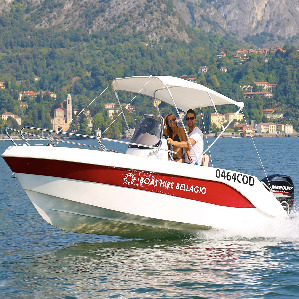

In [57]:
 pic = load_img(FILE_12, target_size=(299,299))
 display(pic)

In [58]:
#image preprocessing
pic_array = img_to_array(pic)
pic_array.shape

(299, 299, 3)

In [59]:
expanded = np.expand_dims(pic_array, axis=0)
expanded.shape

(1, 299, 299, 3)

In [60]:
preprocessed = preprocess_input(expanded)

In [62]:
def getInceptionInput(filePath):
    pic = load_img(filePath, target_size=(299,299))
    pic_array = img_to_array(pic)
    expanded = np.expand_dims(pic_array, axis=0)
    return preprocess_input(expanded)

# Predictions

In [63]:
prediction = inception_model.predict(getInceptionInput(FILE_12))
decode_predictions(prediction)

[[('n04273569', 'speedboat', 0.8907393),
  ('n09421951', 'sandbar', 0.0029226597),
  ('n03344393', 'fireboat', 0.0026931262),
  ('n09332890', 'lakeside', 0.0010051603),
  ('n04483307', 'trimaran', 0.0009946646)]]

In [64]:
def predictWithInception(filePath):
    prediction = inception_model.predict(getInceptionInput(filePath))
    return decode_predictions(prediction)

In [73]:
print(predictWithInception(FILE_12))

[[('n04273569', 'speedboat', 0.8907393), ('n09421951', 'sandbar', 0.0029226597), ('n03344393', 'fireboat', 0.0026931262), ('n09332890', 'lakeside', 0.0010051603), ('n04483307', 'trimaran', 0.0009946646)]]
